In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay)

In [2]:
theta_vector = np.array([-25,0,0,1,1,1,1,1])
N = 1_200_000
np.random.seed(10)
x1_inputs = np.random.uniform(-10, 10, size=N)
np.random.seed(100)
x2_inputs = np.random.uniform(-10, 10, size=N)

In [3]:
row_list = []
labels = []

for x1,x2 in zip(x1_inputs,x2_inputs):
    x_i_vector = np.array([1,x1,x2,x1**2,x2**2,x1**3,x2**3,x1*x2])
    #x_i_vector = np.array([1,x1,x2,x1**2,x2**2,x1**3,x2**3,x1**4])
    row_list.append(x_i_vector)
    
    hypothesis_prediction = np.dot(theta_vector, x_i_vector)
    if hypothesis_prediction >= 25:
        labels.append(1)
    else:
        labels.append(0)


In [4]:
## add some noise to labels so that the two classes are not perfectly seperable
ctr = 1
noisy_labels = []
for x in labels:
    if np.random.random()>.92:
        if x == 0:
            noisy_labels.append(1)
        elif x ==1:
            noisy_labels.append(1)
        print(f"Swapped label on {ctr} records")
        ctr += 1
    else:
        noisy_labels.append(x)
        

Swapped label on 1 records
Swapped label on 2 records
Swapped label on 3 records
Swapped label on 4 records
Swapped label on 5 records
Swapped label on 6 records
Swapped label on 7 records
Swapped label on 8 records
Swapped label on 9 records
Swapped label on 10 records
Swapped label on 11 records
Swapped label on 12 records
Swapped label on 13 records
Swapped label on 14 records
Swapped label on 15 records
Swapped label on 16 records
Swapped label on 17 records
Swapped label on 18 records
Swapped label on 19 records
Swapped label on 20 records
Swapped label on 21 records
Swapped label on 22 records
Swapped label on 23 records
Swapped label on 24 records
Swapped label on 25 records
Swapped label on 26 records
Swapped label on 27 records
Swapped label on 28 records
Swapped label on 29 records
Swapped label on 30 records
Swapped label on 31 records
Swapped label on 32 records
Swapped label on 33 records
Swapped label on 34 records
Swapped label on 35 records
Swapped label on 36 records
S

Swapped label on 1467 records
Swapped label on 1468 records
Swapped label on 1469 records
Swapped label on 1470 records
Swapped label on 1471 records
Swapped label on 1472 records
Swapped label on 1473 records
Swapped label on 1474 records
Swapped label on 1475 records
Swapped label on 1476 records
Swapped label on 1477 records
Swapped label on 1478 records
Swapped label on 1479 records
Swapped label on 1480 records
Swapped label on 1481 records
Swapped label on 1482 records
Swapped label on 1483 records
Swapped label on 1484 records
Swapped label on 1485 records
Swapped label on 1486 records
Swapped label on 1487 records
Swapped label on 1488 records
Swapped label on 1489 records
Swapped label on 1490 records
Swapped label on 1491 records
Swapped label on 1492 records
Swapped label on 1493 records
Swapped label on 1494 records
Swapped label on 1495 records
Swapped label on 1496 records
Swapped label on 1497 records
Swapped label on 1498 records
Swapped label on 1499 records
Swapped la

Swapped label on 2466 records
Swapped label on 2467 records
Swapped label on 2468 records
Swapped label on 2469 records
Swapped label on 2470 records
Swapped label on 2471 records
Swapped label on 2472 records
Swapped label on 2473 records
Swapped label on 2474 records
Swapped label on 2475 records
Swapped label on 2476 records
Swapped label on 2477 records
Swapped label on 2478 records
Swapped label on 2479 records
Swapped label on 2480 records
Swapped label on 2481 records
Swapped label on 2482 records
Swapped label on 2483 records
Swapped label on 2484 records
Swapped label on 2485 records
Swapped label on 2486 records
Swapped label on 2487 records
Swapped label on 2488 records
Swapped label on 2489 records
Swapped label on 2490 records
Swapped label on 2491 records
Swapped label on 2492 records
Swapped label on 2493 records
Swapped label on 2494 records
Swapped label on 2495 records
Swapped label on 2496 records
Swapped label on 2497 records
Swapped label on 2498 records
Swapped la

Swapped label on 3466 records
Swapped label on 3467 records
Swapped label on 3468 records
Swapped label on 3469 records
Swapped label on 3470 records
Swapped label on 3471 records
Swapped label on 3472 records
Swapped label on 3473 records
Swapped label on 3474 records
Swapped label on 3475 records
Swapped label on 3476 records
Swapped label on 3477 records
Swapped label on 3478 records
Swapped label on 3479 records
Swapped label on 3480 records
Swapped label on 3481 records
Swapped label on 3482 records
Swapped label on 3483 records
Swapped label on 3484 records
Swapped label on 3485 records
Swapped label on 3486 records
Swapped label on 3487 records
Swapped label on 3488 records
Swapped label on 3489 records
Swapped label on 3490 records
Swapped label on 3491 records
Swapped label on 3492 records
Swapped label on 3493 records
Swapped label on 3494 records
Swapped label on 3495 records
Swapped label on 3496 records
Swapped label on 3497 records
Swapped label on 3498 records
Swapped la

Swapped label on 4465 records
Swapped label on 4466 records
Swapped label on 4467 records
Swapped label on 4468 records
Swapped label on 4469 records
Swapped label on 4470 records
Swapped label on 4471 records
Swapped label on 4472 records
Swapped label on 4473 records
Swapped label on 4474 records
Swapped label on 4475 records
Swapped label on 4476 records
Swapped label on 4477 records
Swapped label on 4478 records
Swapped label on 4479 records
Swapped label on 4480 records
Swapped label on 4481 records
Swapped label on 4482 records
Swapped label on 4483 records
Swapped label on 4484 records
Swapped label on 4485 records
Swapped label on 4486 records
Swapped label on 4487 records
Swapped label on 4488 records
Swapped label on 4489 records
Swapped label on 4490 records
Swapped label on 4491 records
Swapped label on 4492 records
Swapped label on 4493 records
Swapped label on 4494 records
Swapped label on 4495 records
Swapped label on 4496 records
Swapped label on 4497 records
Swapped la

Swapped label on 5659 records
Swapped label on 5660 records
Swapped label on 5661 records
Swapped label on 5662 records
Swapped label on 5663 records
Swapped label on 5664 records
Swapped label on 5665 records
Swapped label on 5666 records
Swapped label on 5667 records
Swapped label on 5668 records
Swapped label on 5669 records
Swapped label on 5670 records
Swapped label on 5671 records
Swapped label on 5672 records
Swapped label on 5673 records
Swapped label on 5674 records
Swapped label on 5675 records
Swapped label on 5676 records
Swapped label on 5677 records
Swapped label on 5678 records
Swapped label on 5679 records
Swapped label on 5680 records
Swapped label on 5681 records
Swapped label on 5682 records
Swapped label on 5683 records
Swapped label on 5684 records
Swapped label on 5685 records
Swapped label on 5686 records
Swapped label on 5687 records
Swapped label on 5688 records
Swapped label on 5689 records
Swapped label on 5690 records
Swapped label on 5691 records
Swapped la

Swapped label on 6964 records
Swapped label on 6965 records
Swapped label on 6966 records
Swapped label on 6967 records
Swapped label on 6968 records
Swapped label on 6969 records
Swapped label on 6970 records
Swapped label on 6971 records
Swapped label on 6972 records
Swapped label on 6973 records
Swapped label on 6974 records
Swapped label on 6975 records
Swapped label on 6976 records
Swapped label on 6977 records
Swapped label on 6978 records
Swapped label on 6979 records
Swapped label on 6980 records
Swapped label on 6981 records
Swapped label on 6982 records
Swapped label on 6983 records
Swapped label on 6984 records
Swapped label on 6985 records
Swapped label on 6986 records
Swapped label on 6987 records
Swapped label on 6988 records
Swapped label on 6989 records
Swapped label on 6990 records
Swapped label on 6991 records
Swapped label on 6992 records
Swapped label on 6993 records
Swapped label on 6994 records
Swapped label on 6995 records
Swapped label on 6996 records
Swapped la

Swapped label on 8025 records
Swapped label on 8026 records
Swapped label on 8027 records
Swapped label on 8028 records
Swapped label on 8029 records
Swapped label on 8030 records
Swapped label on 8031 records
Swapped label on 8032 records
Swapped label on 8033 records
Swapped label on 8034 records
Swapped label on 8035 records
Swapped label on 8036 records
Swapped label on 8037 records
Swapped label on 8038 records
Swapped label on 8039 records
Swapped label on 8040 records
Swapped label on 8041 records
Swapped label on 8042 records
Swapped label on 8043 records
Swapped label on 8044 records
Swapped label on 8045 records
Swapped label on 8046 records
Swapped label on 8047 records
Swapped label on 8048 records
Swapped label on 8049 records
Swapped label on 8050 records
Swapped label on 8051 records
Swapped label on 8052 records
Swapped label on 8053 records
Swapped label on 8054 records
Swapped label on 8055 records
Swapped label on 8056 records
Swapped label on 8057 records
Swapped la

Swapped label on 9051 records
Swapped label on 9052 records
Swapped label on 9053 records
Swapped label on 9054 records
Swapped label on 9055 records
Swapped label on 9056 records
Swapped label on 9057 records
Swapped label on 9058 records
Swapped label on 9059 records
Swapped label on 9060 records
Swapped label on 9061 records
Swapped label on 9062 records
Swapped label on 9063 records
Swapped label on 9064 records
Swapped label on 9065 records
Swapped label on 9066 records
Swapped label on 9067 records
Swapped label on 9068 records
Swapped label on 9069 records
Swapped label on 9070 records
Swapped label on 9071 records
Swapped label on 9072 records
Swapped label on 9073 records
Swapped label on 9074 records
Swapped label on 9075 records
Swapped label on 9076 records
Swapped label on 9077 records
Swapped label on 9078 records
Swapped label on 9079 records
Swapped label on 9080 records
Swapped label on 9081 records
Swapped label on 9082 records
Swapped label on 9083 records
Swapped la

Swapped label on 9963 records
Swapped label on 9964 records
Swapped label on 9965 records
Swapped label on 9966 records
Swapped label on 9967 records
Swapped label on 9968 records
Swapped label on 9969 records
Swapped label on 9970 records
Swapped label on 9971 records
Swapped label on 9972 records
Swapped label on 9973 records
Swapped label on 9974 records
Swapped label on 9975 records
Swapped label on 9976 records
Swapped label on 9977 records
Swapped label on 9978 records
Swapped label on 9979 records
Swapped label on 9980 records
Swapped label on 9981 records
Swapped label on 9982 records
Swapped label on 9983 records
Swapped label on 9984 records
Swapped label on 9985 records
Swapped label on 9986 records
Swapped label on 9987 records
Swapped label on 9988 records
Swapped label on 9989 records
Swapped label on 9990 records
Swapped label on 9991 records
Swapped label on 9992 records
Swapped label on 9993 records
Swapped label on 9994 records
Swapped label on 9995 records
Swapped la

Swapped label on 10962 records
Swapped label on 10963 records
Swapped label on 10964 records
Swapped label on 10965 records
Swapped label on 10966 records
Swapped label on 10967 records
Swapped label on 10968 records
Swapped label on 10969 records
Swapped label on 10970 records
Swapped label on 10971 records
Swapped label on 10972 records
Swapped label on 10973 records
Swapped label on 10974 records
Swapped label on 10975 records
Swapped label on 10976 records
Swapped label on 10977 records
Swapped label on 10978 records
Swapped label on 10979 records
Swapped label on 10980 records
Swapped label on 10981 records
Swapped label on 10982 records
Swapped label on 10983 records
Swapped label on 10984 records
Swapped label on 10985 records
Swapped label on 10986 records
Swapped label on 10987 records
Swapped label on 10988 records
Swapped label on 10989 records
Swapped label on 10990 records
Swapped label on 10991 records
Swapped label on 10992 records
Swapped label on 10993 records
Swapped 

Swapped label on 12169 records
Swapped label on 12170 records
Swapped label on 12171 records
Swapped label on 12172 records
Swapped label on 12173 records
Swapped label on 12174 records
Swapped label on 12175 records
Swapped label on 12176 records
Swapped label on 12177 records
Swapped label on 12178 records
Swapped label on 12179 records
Swapped label on 12180 records
Swapped label on 12181 records
Swapped label on 12182 records
Swapped label on 12183 records
Swapped label on 12184 records
Swapped label on 12185 records
Swapped label on 12186 records
Swapped label on 12187 records
Swapped label on 12188 records
Swapped label on 12189 records
Swapped label on 12190 records
Swapped label on 12191 records
Swapped label on 12192 records
Swapped label on 12193 records
Swapped label on 12194 records
Swapped label on 12195 records
Swapped label on 12196 records
Swapped label on 12197 records
Swapped label on 12198 records
Swapped label on 12199 records
Swapped label on 12200 records
Swapped 

Swapped label on 13299 records
Swapped label on 13300 records
Swapped label on 13301 records
Swapped label on 13302 records
Swapped label on 13303 records
Swapped label on 13304 records
Swapped label on 13305 records
Swapped label on 13306 records
Swapped label on 13307 records
Swapped label on 13308 records
Swapped label on 13309 records
Swapped label on 13310 records
Swapped label on 13311 records
Swapped label on 13312 records
Swapped label on 13313 records
Swapped label on 13314 records
Swapped label on 13315 records
Swapped label on 13316 records
Swapped label on 13317 records
Swapped label on 13318 records
Swapped label on 13319 records
Swapped label on 13320 records
Swapped label on 13321 records
Swapped label on 13322 records
Swapped label on 13323 records
Swapped label on 13324 records
Swapped label on 13325 records
Swapped label on 13326 records
Swapped label on 13327 records
Swapped label on 13328 records
Swapped label on 13329 records
Swapped label on 13330 records
Swapped 

Swapped label on 14364 records
Swapped label on 14365 records
Swapped label on 14366 records
Swapped label on 14367 records
Swapped label on 14368 records
Swapped label on 14369 records
Swapped label on 14370 records
Swapped label on 14371 records
Swapped label on 14372 records
Swapped label on 14373 records
Swapped label on 14374 records
Swapped label on 14375 records
Swapped label on 14376 records
Swapped label on 14377 records
Swapped label on 14378 records
Swapped label on 14379 records
Swapped label on 14380 records
Swapped label on 14381 records
Swapped label on 14382 records
Swapped label on 14383 records
Swapped label on 14384 records
Swapped label on 14385 records
Swapped label on 14386 records
Swapped label on 14387 records
Swapped label on 14388 records
Swapped label on 14389 records
Swapped label on 14390 records
Swapped label on 14391 records
Swapped label on 14392 records
Swapped label on 14393 records
Swapped label on 14394 records
Swapped label on 14395 records
Swapped 

Swapped label on 15345 records
Swapped label on 15346 records
Swapped label on 15347 records
Swapped label on 15348 records
Swapped label on 15349 records
Swapped label on 15350 records
Swapped label on 15351 records
Swapped label on 15352 records
Swapped label on 15353 records
Swapped label on 15354 records
Swapped label on 15355 records
Swapped label on 15356 records
Swapped label on 15357 records
Swapped label on 15358 records
Swapped label on 15359 records
Swapped label on 15360 records
Swapped label on 15361 records
Swapped label on 15362 records
Swapped label on 15363 records
Swapped label on 15364 records
Swapped label on 15365 records
Swapped label on 15366 records
Swapped label on 15367 records
Swapped label on 15368 records
Swapped label on 15369 records
Swapped label on 15370 records
Swapped label on 15371 records
Swapped label on 15372 records
Swapped label on 15373 records
Swapped label on 15374 records
Swapped label on 15375 records
Swapped label on 15376 records
Swapped 

Swapped label on 16460 records
Swapped label on 16461 records
Swapped label on 16462 records
Swapped label on 16463 records
Swapped label on 16464 records
Swapped label on 16465 records
Swapped label on 16466 records
Swapped label on 16467 records
Swapped label on 16468 records
Swapped label on 16469 records
Swapped label on 16470 records
Swapped label on 16471 records
Swapped label on 16472 records
Swapped label on 16473 records
Swapped label on 16474 records
Swapped label on 16475 records
Swapped label on 16476 records
Swapped label on 16477 records
Swapped label on 16478 records
Swapped label on 16479 records
Swapped label on 16480 records
Swapped label on 16481 records
Swapped label on 16482 records
Swapped label on 16483 records
Swapped label on 16484 records
Swapped label on 16485 records
Swapped label on 16486 records
Swapped label on 16487 records
Swapped label on 16488 records
Swapped label on 16489 records
Swapped label on 16490 records
Swapped label on 16491 records
Swapped 

Swapped label on 17569 records
Swapped label on 17570 records
Swapped label on 17571 records
Swapped label on 17572 records
Swapped label on 17573 records
Swapped label on 17574 records
Swapped label on 17575 records
Swapped label on 17576 records
Swapped label on 17577 records
Swapped label on 17578 records
Swapped label on 17579 records
Swapped label on 17580 records
Swapped label on 17581 records
Swapped label on 17582 records
Swapped label on 17583 records
Swapped label on 17584 records
Swapped label on 17585 records
Swapped label on 17586 records
Swapped label on 17587 records
Swapped label on 17588 records
Swapped label on 17589 records
Swapped label on 17590 records
Swapped label on 17591 records
Swapped label on 17592 records
Swapped label on 17593 records
Swapped label on 17594 records
Swapped label on 17595 records
Swapped label on 17596 records
Swapped label on 17597 records
Swapped label on 17598 records
Swapped label on 17599 records
Swapped label on 17600 records
Swapped 

Swapped label on 18619 records
Swapped label on 18620 records
Swapped label on 18621 records
Swapped label on 18622 records
Swapped label on 18623 records
Swapped label on 18624 records
Swapped label on 18625 records
Swapped label on 18626 records
Swapped label on 18627 records
Swapped label on 18628 records
Swapped label on 18629 records
Swapped label on 18630 records
Swapped label on 18631 records
Swapped label on 18632 records
Swapped label on 18633 records
Swapped label on 18634 records
Swapped label on 18635 records
Swapped label on 18636 records
Swapped label on 18637 records
Swapped label on 18638 records
Swapped label on 18639 records
Swapped label on 18640 records
Swapped label on 18641 records
Swapped label on 18642 records
Swapped label on 18643 records
Swapped label on 18644 records
Swapped label on 18645 records
Swapped label on 18646 records
Swapped label on 18647 records
Swapped label on 18648 records
Swapped label on 18649 records
Swapped label on 18650 records
Swapped 

Swapped label on 19645 records
Swapped label on 19646 records
Swapped label on 19647 records
Swapped label on 19648 records
Swapped label on 19649 records
Swapped label on 19650 records
Swapped label on 19651 records
Swapped label on 19652 records
Swapped label on 19653 records
Swapped label on 19654 records
Swapped label on 19655 records
Swapped label on 19656 records
Swapped label on 19657 records
Swapped label on 19658 records
Swapped label on 19659 records
Swapped label on 19660 records
Swapped label on 19661 records
Swapped label on 19662 records
Swapped label on 19663 records
Swapped label on 19664 records
Swapped label on 19665 records
Swapped label on 19666 records
Swapped label on 19667 records
Swapped label on 19668 records
Swapped label on 19669 records
Swapped label on 19670 records
Swapped label on 19671 records
Swapped label on 19672 records
Swapped label on 19673 records
Swapped label on 19674 records
Swapped label on 19675 records
Swapped label on 19676 records
Swapped 

Swapped label on 20876 records
Swapped label on 20877 records
Swapped label on 20878 records
Swapped label on 20879 records
Swapped label on 20880 records
Swapped label on 20881 records
Swapped label on 20882 records
Swapped label on 20883 records
Swapped label on 20884 records
Swapped label on 20885 records
Swapped label on 20886 records
Swapped label on 20887 records
Swapped label on 20888 records
Swapped label on 20889 records
Swapped label on 20890 records
Swapped label on 20891 records
Swapped label on 20892 records
Swapped label on 20893 records
Swapped label on 20894 records
Swapped label on 20895 records
Swapped label on 20896 records
Swapped label on 20897 records
Swapped label on 20898 records
Swapped label on 20899 records
Swapped label on 20900 records
Swapped label on 20901 records
Swapped label on 20902 records
Swapped label on 20903 records
Swapped label on 20904 records
Swapped label on 20905 records
Swapped label on 20906 records
Swapped label on 20907 records
Swapped 

Swapped label on 21760 records
Swapped label on 21761 records
Swapped label on 21762 records
Swapped label on 21763 records
Swapped label on 21764 records
Swapped label on 21765 records
Swapped label on 21766 records
Swapped label on 21767 records
Swapped label on 21768 records
Swapped label on 21769 records
Swapped label on 21770 records
Swapped label on 21771 records
Swapped label on 21772 records
Swapped label on 21773 records
Swapped label on 21774 records
Swapped label on 21775 records
Swapped label on 21776 records
Swapped label on 21777 records
Swapped label on 21778 records
Swapped label on 21779 records
Swapped label on 21780 records
Swapped label on 21781 records
Swapped label on 21782 records
Swapped label on 21783 records
Swapped label on 21784 records
Swapped label on 21785 records
Swapped label on 21786 records
Swapped label on 21787 records
Swapped label on 21788 records
Swapped label on 21789 records
Swapped label on 21790 records
Swapped label on 21791 records
Swapped 

Swapped label on 22698 records
Swapped label on 22699 records
Swapped label on 22700 records
Swapped label on 22701 records
Swapped label on 22702 records
Swapped label on 22703 records
Swapped label on 22704 records
Swapped label on 22705 records
Swapped label on 22706 records
Swapped label on 22707 records
Swapped label on 22708 records
Swapped label on 22709 records
Swapped label on 22710 records
Swapped label on 22711 records
Swapped label on 22712 records
Swapped label on 22713 records
Swapped label on 22714 records
Swapped label on 22715 records
Swapped label on 22716 records
Swapped label on 22717 records
Swapped label on 22718 records
Swapped label on 22719 records
Swapped label on 22720 records
Swapped label on 22721 records
Swapped label on 22722 records
Swapped label on 22723 records
Swapped label on 22724 records
Swapped label on 22725 records
Swapped label on 22726 records
Swapped label on 22727 records
Swapped label on 22728 records
Swapped label on 22729 records
Swapped 

Swapped label on 23533 records
Swapped label on 23534 records
Swapped label on 23535 records
Swapped label on 23536 records
Swapped label on 23537 records
Swapped label on 23538 records
Swapped label on 23539 records
Swapped label on 23540 records
Swapped label on 23541 records
Swapped label on 23542 records
Swapped label on 23543 records
Swapped label on 23544 records
Swapped label on 23545 records
Swapped label on 23546 records
Swapped label on 23547 records
Swapped label on 23548 records
Swapped label on 23549 records
Swapped label on 23550 records
Swapped label on 23551 records
Swapped label on 23552 records
Swapped label on 23553 records
Swapped label on 23554 records
Swapped label on 23555 records
Swapped label on 23556 records
Swapped label on 23557 records
Swapped label on 23558 records
Swapped label on 23559 records
Swapped label on 23560 records
Swapped label on 23561 records
Swapped label on 23562 records
Swapped label on 23563 records
Swapped label on 23564 records
Swapped 

Swapped label on 24788 records
Swapped label on 24789 records
Swapped label on 24790 records
Swapped label on 24791 records
Swapped label on 24792 records
Swapped label on 24793 records
Swapped label on 24794 records
Swapped label on 24795 records
Swapped label on 24796 records
Swapped label on 24797 records
Swapped label on 24798 records
Swapped label on 24799 records
Swapped label on 24800 records
Swapped label on 24801 records
Swapped label on 24802 records
Swapped label on 24803 records
Swapped label on 24804 records
Swapped label on 24805 records
Swapped label on 24806 records
Swapped label on 24807 records
Swapped label on 24808 records
Swapped label on 24809 records
Swapped label on 24810 records
Swapped label on 24811 records
Swapped label on 24812 records
Swapped label on 24813 records
Swapped label on 24814 records
Swapped label on 24815 records
Swapped label on 24816 records
Swapped label on 24817 records
Swapped label on 24818 records
Swapped label on 24819 records
Swapped 

Swapped label on 25719 records
Swapped label on 25720 records
Swapped label on 25721 records
Swapped label on 25722 records
Swapped label on 25723 records
Swapped label on 25724 records
Swapped label on 25725 records
Swapped label on 25726 records
Swapped label on 25727 records
Swapped label on 25728 records
Swapped label on 25729 records
Swapped label on 25730 records
Swapped label on 25731 records
Swapped label on 25732 records
Swapped label on 25733 records
Swapped label on 25734 records
Swapped label on 25735 records
Swapped label on 25736 records
Swapped label on 25737 records
Swapped label on 25738 records
Swapped label on 25739 records
Swapped label on 25740 records
Swapped label on 25741 records
Swapped label on 25742 records
Swapped label on 25743 records
Swapped label on 25744 records
Swapped label on 25745 records
Swapped label on 25746 records
Swapped label on 25747 records
Swapped label on 25748 records
Swapped label on 25749 records
Swapped label on 25750 records
Swapped 

Swapped label on 26620 records
Swapped label on 26621 records
Swapped label on 26622 records
Swapped label on 26623 records
Swapped label on 26624 records
Swapped label on 26625 records
Swapped label on 26626 records
Swapped label on 26627 records
Swapped label on 26628 records
Swapped label on 26629 records
Swapped label on 26630 records
Swapped label on 26631 records
Swapped label on 26632 records
Swapped label on 26633 records
Swapped label on 26634 records
Swapped label on 26635 records
Swapped label on 26636 records
Swapped label on 26637 records
Swapped label on 26638 records
Swapped label on 26639 records
Swapped label on 26640 records
Swapped label on 26641 records
Swapped label on 26642 records
Swapped label on 26643 records
Swapped label on 26644 records
Swapped label on 26645 records
Swapped label on 26646 records
Swapped label on 26647 records
Swapped label on 26648 records
Swapped label on 26649 records
Swapped label on 26650 records
Swapped label on 26651 records
Swapped 

Swapped label on 27250 records
Swapped label on 27251 records
Swapped label on 27252 records
Swapped label on 27253 records
Swapped label on 27254 records
Swapped label on 27255 records
Swapped label on 27256 records
Swapped label on 27257 records
Swapped label on 27258 records
Swapped label on 27259 records
Swapped label on 27260 records
Swapped label on 27261 records
Swapped label on 27262 records
Swapped label on 27263 records
Swapped label on 27264 records
Swapped label on 27265 records
Swapped label on 27266 records
Swapped label on 27267 records
Swapped label on 27268 records
Swapped label on 27269 records
Swapped label on 27270 records
Swapped label on 27271 records
Swapped label on 27272 records
Swapped label on 27273 records
Swapped label on 27274 records
Swapped label on 27275 records
Swapped label on 27276 records
Swapped label on 27277 records
Swapped label on 27278 records
Swapped label on 27279 records
Swapped label on 27280 records
Swapped label on 27281 records
Swapped 

Swapped label on 28320 records
Swapped label on 28321 records
Swapped label on 28322 records
Swapped label on 28323 records
Swapped label on 28324 records
Swapped label on 28325 records
Swapped label on 28326 records
Swapped label on 28327 records
Swapped label on 28328 records
Swapped label on 28329 records
Swapped label on 28330 records
Swapped label on 28331 records
Swapped label on 28332 records
Swapped label on 28333 records
Swapped label on 28334 records
Swapped label on 28335 records
Swapped label on 28336 records
Swapped label on 28337 records
Swapped label on 28338 records
Swapped label on 28339 records
Swapped label on 28340 records
Swapped label on 28341 records
Swapped label on 28342 records
Swapped label on 28343 records
Swapped label on 28344 records
Swapped label on 28345 records
Swapped label on 28346 records
Swapped label on 28347 records
Swapped label on 28348 records
Swapped label on 28349 records
Swapped label on 28350 records
Swapped label on 28351 records
Swapped 

Swapped label on 29178 records
Swapped label on 29179 records
Swapped label on 29180 records
Swapped label on 29181 records
Swapped label on 29182 records
Swapped label on 29183 records
Swapped label on 29184 records
Swapped label on 29185 records
Swapped label on 29186 records
Swapped label on 29187 records
Swapped label on 29188 records
Swapped label on 29189 records
Swapped label on 29190 records
Swapped label on 29191 records
Swapped label on 29192 records
Swapped label on 29193 records
Swapped label on 29194 records
Swapped label on 29195 records
Swapped label on 29196 records
Swapped label on 29197 records
Swapped label on 29198 records
Swapped label on 29199 records
Swapped label on 29200 records
Swapped label on 29201 records
Swapped label on 29202 records
Swapped label on 29203 records
Swapped label on 29204 records
Swapped label on 29205 records
Swapped label on 29206 records
Swapped label on 29207 records
Swapped label on 29208 records
Swapped label on 29209 records
Swapped 

Swapped label on 30307 records
Swapped label on 30308 records
Swapped label on 30309 records
Swapped label on 30310 records
Swapped label on 30311 records
Swapped label on 30312 records
Swapped label on 30313 records
Swapped label on 30314 records
Swapped label on 30315 records
Swapped label on 30316 records
Swapped label on 30317 records
Swapped label on 30318 records
Swapped label on 30319 records
Swapped label on 30320 records
Swapped label on 30321 records
Swapped label on 30322 records
Swapped label on 30323 records
Swapped label on 30324 records
Swapped label on 30325 records
Swapped label on 30326 records
Swapped label on 30327 records
Swapped label on 30328 records
Swapped label on 30329 records
Swapped label on 30330 records
Swapped label on 30331 records
Swapped label on 30332 records
Swapped label on 30333 records
Swapped label on 30334 records
Swapped label on 30335 records
Swapped label on 30336 records
Swapped label on 30337 records
Swapped label on 30338 records
Swapped 

Swapped label on 31465 records
Swapped label on 31466 records
Swapped label on 31467 records
Swapped label on 31468 records
Swapped label on 31469 records
Swapped label on 31470 records
Swapped label on 31471 records
Swapped label on 31472 records
Swapped label on 31473 records
Swapped label on 31474 records
Swapped label on 31475 records
Swapped label on 31476 records
Swapped label on 31477 records
Swapped label on 31478 records
Swapped label on 31479 records
Swapped label on 31480 records
Swapped label on 31481 records
Swapped label on 31482 records
Swapped label on 31483 records
Swapped label on 31484 records
Swapped label on 31485 records
Swapped label on 31486 records
Swapped label on 31487 records
Swapped label on 31488 records
Swapped label on 31489 records
Swapped label on 31490 records
Swapped label on 31491 records
Swapped label on 31492 records
Swapped label on 31493 records
Swapped label on 31494 records
Swapped label on 31495 records
Swapped label on 31496 records
Swapped 

Swapped label on 32248 records
Swapped label on 32249 records
Swapped label on 32250 records
Swapped label on 32251 records
Swapped label on 32252 records
Swapped label on 32253 records
Swapped label on 32254 records
Swapped label on 32255 records
Swapped label on 32256 records
Swapped label on 32257 records
Swapped label on 32258 records
Swapped label on 32259 records
Swapped label on 32260 records
Swapped label on 32261 records
Swapped label on 32262 records
Swapped label on 32263 records
Swapped label on 32264 records
Swapped label on 32265 records
Swapped label on 32266 records
Swapped label on 32267 records
Swapped label on 32268 records
Swapped label on 32269 records
Swapped label on 32270 records
Swapped label on 32271 records
Swapped label on 32272 records
Swapped label on 32273 records
Swapped label on 32274 records
Swapped label on 32275 records
Swapped label on 32276 records
Swapped label on 32277 records
Swapped label on 32278 records
Swapped label on 32279 records
Swapped 

Swapped label on 33451 records
Swapped label on 33452 records
Swapped label on 33453 records
Swapped label on 33454 records
Swapped label on 33455 records
Swapped label on 33456 records
Swapped label on 33457 records
Swapped label on 33458 records
Swapped label on 33459 records
Swapped label on 33460 records
Swapped label on 33461 records
Swapped label on 33462 records
Swapped label on 33463 records
Swapped label on 33464 records
Swapped label on 33465 records
Swapped label on 33466 records
Swapped label on 33467 records
Swapped label on 33468 records
Swapped label on 33469 records
Swapped label on 33470 records
Swapped label on 33471 records
Swapped label on 33472 records
Swapped label on 33473 records
Swapped label on 33474 records
Swapped label on 33475 records
Swapped label on 33476 records
Swapped label on 33477 records
Swapped label on 33478 records
Swapped label on 33479 records
Swapped label on 33480 records
Swapped label on 33481 records
Swapped label on 33482 records
Swapped 

Swapped label on 34481 records
Swapped label on 34482 records
Swapped label on 34483 records
Swapped label on 34484 records
Swapped label on 34485 records
Swapped label on 34486 records
Swapped label on 34487 records
Swapped label on 34488 records
Swapped label on 34489 records
Swapped label on 34490 records
Swapped label on 34491 records
Swapped label on 34492 records
Swapped label on 34493 records
Swapped label on 34494 records
Swapped label on 34495 records
Swapped label on 34496 records
Swapped label on 34497 records
Swapped label on 34498 records
Swapped label on 34499 records
Swapped label on 34500 records
Swapped label on 34501 records
Swapped label on 34502 records
Swapped label on 34503 records
Swapped label on 34504 records
Swapped label on 34505 records
Swapped label on 34506 records
Swapped label on 34507 records
Swapped label on 34508 records
Swapped label on 34509 records
Swapped label on 34510 records
Swapped label on 34511 records
Swapped label on 34512 records
Swapped 

Swapped label on 35367 records
Swapped label on 35368 records
Swapped label on 35369 records
Swapped label on 35370 records
Swapped label on 35371 records
Swapped label on 35372 records
Swapped label on 35373 records
Swapped label on 35374 records
Swapped label on 35375 records
Swapped label on 35376 records
Swapped label on 35377 records
Swapped label on 35378 records
Swapped label on 35379 records
Swapped label on 35380 records
Swapped label on 35381 records
Swapped label on 35382 records
Swapped label on 35383 records
Swapped label on 35384 records
Swapped label on 35385 records
Swapped label on 35386 records
Swapped label on 35387 records
Swapped label on 35388 records
Swapped label on 35389 records
Swapped label on 35390 records
Swapped label on 35391 records
Swapped label on 35392 records
Swapped label on 35393 records
Swapped label on 35394 records
Swapped label on 35395 records
Swapped label on 35396 records
Swapped label on 35397 records
Swapped label on 35398 records
Swapped 

Swapped label on 36343 records
Swapped label on 36344 records
Swapped label on 36345 records
Swapped label on 36346 records
Swapped label on 36347 records
Swapped label on 36348 records
Swapped label on 36349 records
Swapped label on 36350 records
Swapped label on 36351 records
Swapped label on 36352 records
Swapped label on 36353 records
Swapped label on 36354 records
Swapped label on 36355 records
Swapped label on 36356 records
Swapped label on 36357 records
Swapped label on 36358 records
Swapped label on 36359 records
Swapped label on 36360 records
Swapped label on 36361 records
Swapped label on 36362 records
Swapped label on 36363 records
Swapped label on 36364 records
Swapped label on 36365 records
Swapped label on 36366 records
Swapped label on 36367 records
Swapped label on 36368 records
Swapped label on 36369 records
Swapped label on 36370 records
Swapped label on 36371 records
Swapped label on 36372 records
Swapped label on 36373 records
Swapped label on 36374 records
Swapped 

Swapped label on 37513 records
Swapped label on 37514 records
Swapped label on 37515 records
Swapped label on 37516 records
Swapped label on 37517 records
Swapped label on 37518 records
Swapped label on 37519 records
Swapped label on 37520 records
Swapped label on 37521 records
Swapped label on 37522 records
Swapped label on 37523 records
Swapped label on 37524 records
Swapped label on 37525 records
Swapped label on 37526 records
Swapped label on 37527 records
Swapped label on 37528 records
Swapped label on 37529 records
Swapped label on 37530 records
Swapped label on 37531 records
Swapped label on 37532 records
Swapped label on 37533 records
Swapped label on 37534 records
Swapped label on 37535 records
Swapped label on 37536 records
Swapped label on 37537 records
Swapped label on 37538 records
Swapped label on 37539 records
Swapped label on 37540 records
Swapped label on 37541 records
Swapped label on 37542 records
Swapped label on 37543 records
Swapped label on 37544 records
Swapped 

Swapped label on 38948 records
Swapped label on 38949 records
Swapped label on 38950 records
Swapped label on 38951 records
Swapped label on 38952 records
Swapped label on 38953 records
Swapped label on 38954 records
Swapped label on 38955 records
Swapped label on 38956 records
Swapped label on 38957 records
Swapped label on 38958 records
Swapped label on 38959 records
Swapped label on 38960 records
Swapped label on 38961 records
Swapped label on 38962 records
Swapped label on 38963 records
Swapped label on 38964 records
Swapped label on 38965 records
Swapped label on 38966 records
Swapped label on 38967 records
Swapped label on 38968 records
Swapped label on 38969 records
Swapped label on 38970 records
Swapped label on 38971 records
Swapped label on 38972 records
Swapped label on 38973 records
Swapped label on 38974 records
Swapped label on 38975 records
Swapped label on 38976 records
Swapped label on 38977 records
Swapped label on 38978 records
Swapped label on 38979 records
Swapped 

Swapped label on 39913 records
Swapped label on 39914 records
Swapped label on 39915 records
Swapped label on 39916 records
Swapped label on 39917 records
Swapped label on 39918 records
Swapped label on 39919 records
Swapped label on 39920 records
Swapped label on 39921 records
Swapped label on 39922 records
Swapped label on 39923 records
Swapped label on 39924 records
Swapped label on 39925 records
Swapped label on 39926 records
Swapped label on 39927 records
Swapped label on 39928 records
Swapped label on 39929 records
Swapped label on 39930 records
Swapped label on 39931 records
Swapped label on 39932 records
Swapped label on 39933 records
Swapped label on 39934 records
Swapped label on 39935 records
Swapped label on 39936 records
Swapped label on 39937 records
Swapped label on 39938 records
Swapped label on 39939 records
Swapped label on 39940 records
Swapped label on 39941 records
Swapped label on 39942 records
Swapped label on 39943 records
Swapped label on 39944 records
Swapped 

Swapped label on 41417 records
Swapped label on 41418 records
Swapped label on 41419 records
Swapped label on 41420 records
Swapped label on 41421 records
Swapped label on 41422 records
Swapped label on 41423 records
Swapped label on 41424 records
Swapped label on 41425 records
Swapped label on 41426 records
Swapped label on 41427 records
Swapped label on 41428 records
Swapped label on 41429 records
Swapped label on 41430 records
Swapped label on 41431 records
Swapped label on 41432 records
Swapped label on 41433 records
Swapped label on 41434 records
Swapped label on 41435 records
Swapped label on 41436 records
Swapped label on 41437 records
Swapped label on 41438 records
Swapped label on 41439 records
Swapped label on 41440 records
Swapped label on 41441 records
Swapped label on 41442 records
Swapped label on 41443 records
Swapped label on 41444 records
Swapped label on 41445 records
Swapped label on 41446 records
Swapped label on 41447 records
Swapped label on 41448 records
Swapped 

Swapped label on 41974 records
Swapped label on 41975 records
Swapped label on 41976 records
Swapped label on 41977 records
Swapped label on 41978 records
Swapped label on 41979 records
Swapped label on 41980 records
Swapped label on 41981 records
Swapped label on 41982 records
Swapped label on 41983 records
Swapped label on 41984 records
Swapped label on 41985 records
Swapped label on 41986 records
Swapped label on 41987 records
Swapped label on 41988 records
Swapped label on 41989 records
Swapped label on 41990 records
Swapped label on 41991 records
Swapped label on 41992 records
Swapped label on 41993 records
Swapped label on 41994 records
Swapped label on 41995 records
Swapped label on 41996 records
Swapped label on 41997 records
Swapped label on 41998 records
Swapped label on 41999 records
Swapped label on 42000 records
Swapped label on 42001 records
Swapped label on 42002 records
Swapped label on 42003 records
Swapped label on 42004 records
Swapped label on 42005 records
Swapped 

Swapped label on 43140 records
Swapped label on 43141 records
Swapped label on 43142 records
Swapped label on 43143 records
Swapped label on 43144 records
Swapped label on 43145 records
Swapped label on 43146 records
Swapped label on 43147 records
Swapped label on 43148 records
Swapped label on 43149 records
Swapped label on 43150 records
Swapped label on 43151 records
Swapped label on 43152 records
Swapped label on 43153 records
Swapped label on 43154 records
Swapped label on 43155 records
Swapped label on 43156 records
Swapped label on 43157 records
Swapped label on 43158 records
Swapped label on 43159 records
Swapped label on 43160 records
Swapped label on 43161 records
Swapped label on 43162 records
Swapped label on 43163 records
Swapped label on 43164 records
Swapped label on 43165 records
Swapped label on 43166 records
Swapped label on 43167 records
Swapped label on 43168 records
Swapped label on 43169 records
Swapped label on 43170 records
Swapped label on 43171 records
Swapped 

Swapped label on 44058 records
Swapped label on 44059 records
Swapped label on 44060 records
Swapped label on 44061 records
Swapped label on 44062 records
Swapped label on 44063 records
Swapped label on 44064 records
Swapped label on 44065 records
Swapped label on 44066 records
Swapped label on 44067 records
Swapped label on 44068 records
Swapped label on 44069 records
Swapped label on 44070 records
Swapped label on 44071 records
Swapped label on 44072 records
Swapped label on 44073 records
Swapped label on 44074 records
Swapped label on 44075 records
Swapped label on 44076 records
Swapped label on 44077 records
Swapped label on 44078 records
Swapped label on 44079 records
Swapped label on 44080 records
Swapped label on 44081 records
Swapped label on 44082 records
Swapped label on 44083 records
Swapped label on 44084 records
Swapped label on 44085 records
Swapped label on 44086 records
Swapped label on 44087 records
Swapped label on 44088 records
Swapped label on 44089 records
Swapped 

Swapped label on 44620 records
Swapped label on 44621 records
Swapped label on 44622 records
Swapped label on 44623 records
Swapped label on 44624 records
Swapped label on 44625 records
Swapped label on 44626 records
Swapped label on 44627 records
Swapped label on 44628 records
Swapped label on 44629 records
Swapped label on 44630 records
Swapped label on 44631 records
Swapped label on 44632 records
Swapped label on 44633 records
Swapped label on 44634 records
Swapped label on 44635 records
Swapped label on 44636 records
Swapped label on 44637 records
Swapped label on 44638 records
Swapped label on 44639 records
Swapped label on 44640 records
Swapped label on 44641 records
Swapped label on 44642 records
Swapped label on 44643 records
Swapped label on 44644 records
Swapped label on 44645 records
Swapped label on 44646 records
Swapped label on 44647 records
Swapped label on 44648 records
Swapped label on 44649 records
Swapped label on 44650 records
Swapped label on 44651 records
Swapped 

Swapped label on 45510 records
Swapped label on 45511 records
Swapped label on 45512 records
Swapped label on 45513 records
Swapped label on 45514 records
Swapped label on 45515 records
Swapped label on 45516 records
Swapped label on 45517 records
Swapped label on 45518 records
Swapped label on 45519 records
Swapped label on 45520 records
Swapped label on 45521 records
Swapped label on 45522 records
Swapped label on 45523 records
Swapped label on 45524 records
Swapped label on 45525 records
Swapped label on 45526 records
Swapped label on 45527 records
Swapped label on 45528 records
Swapped label on 45529 records
Swapped label on 45530 records
Swapped label on 45531 records
Swapped label on 45532 records
Swapped label on 45533 records
Swapped label on 45534 records
Swapped label on 45535 records
Swapped label on 45536 records
Swapped label on 45537 records
Swapped label on 45538 records
Swapped label on 45539 records
Swapped label on 45540 records
Swapped label on 45541 records
Swapped 

Swapped label on 46944 records
Swapped label on 46945 records
Swapped label on 46946 records
Swapped label on 46947 records
Swapped label on 46948 records
Swapped label on 46949 records
Swapped label on 46950 records
Swapped label on 46951 records
Swapped label on 46952 records
Swapped label on 46953 records
Swapped label on 46954 records
Swapped label on 46955 records
Swapped label on 46956 records
Swapped label on 46957 records
Swapped label on 46958 records
Swapped label on 46959 records
Swapped label on 46960 records
Swapped label on 46961 records
Swapped label on 46962 records
Swapped label on 46963 records
Swapped label on 46964 records
Swapped label on 46965 records
Swapped label on 46966 records
Swapped label on 46967 records
Swapped label on 46968 records
Swapped label on 46969 records
Swapped label on 46970 records
Swapped label on 46971 records
Swapped label on 46972 records
Swapped label on 46973 records
Swapped label on 46974 records
Swapped label on 46975 records
Swapped 

Swapped label on 47944 records
Swapped label on 47945 records
Swapped label on 47946 records
Swapped label on 47947 records
Swapped label on 47948 records
Swapped label on 47949 records
Swapped label on 47950 records
Swapped label on 47951 records
Swapped label on 47952 records
Swapped label on 47953 records
Swapped label on 47954 records
Swapped label on 47955 records
Swapped label on 47956 records
Swapped label on 47957 records
Swapped label on 47958 records
Swapped label on 47959 records
Swapped label on 47960 records
Swapped label on 47961 records
Swapped label on 47962 records
Swapped label on 47963 records
Swapped label on 47964 records
Swapped label on 47965 records
Swapped label on 47966 records
Swapped label on 47967 records
Swapped label on 47968 records
Swapped label on 47969 records
Swapped label on 47970 records
Swapped label on 47971 records
Swapped label on 47972 records
Swapped label on 47973 records
Swapped label on 47974 records
Swapped label on 47975 records
Swapped 

Swapped label on 48943 records
Swapped label on 48944 records
Swapped label on 48945 records
Swapped label on 48946 records
Swapped label on 48947 records
Swapped label on 48948 records
Swapped label on 48949 records
Swapped label on 48950 records
Swapped label on 48951 records
Swapped label on 48952 records
Swapped label on 48953 records
Swapped label on 48954 records
Swapped label on 48955 records
Swapped label on 48956 records
Swapped label on 48957 records
Swapped label on 48958 records
Swapped label on 48959 records
Swapped label on 48960 records
Swapped label on 48961 records
Swapped label on 48962 records
Swapped label on 48963 records
Swapped label on 48964 records
Swapped label on 48965 records
Swapped label on 48966 records
Swapped label on 48967 records
Swapped label on 48968 records
Swapped label on 48969 records
Swapped label on 48970 records
Swapped label on 48971 records
Swapped label on 48972 records
Swapped label on 48973 records
Swapped label on 48974 records
Swapped 

Swapped label on 49943 records
Swapped label on 49944 records
Swapped label on 49945 records
Swapped label on 49946 records
Swapped label on 49947 records
Swapped label on 49948 records
Swapped label on 49949 records
Swapped label on 49950 records
Swapped label on 49951 records
Swapped label on 49952 records
Swapped label on 49953 records
Swapped label on 49954 records
Swapped label on 49955 records
Swapped label on 49956 records
Swapped label on 49957 records
Swapped label on 49958 records
Swapped label on 49959 records
Swapped label on 49960 records
Swapped label on 49961 records
Swapped label on 49962 records
Swapped label on 49963 records
Swapped label on 49964 records
Swapped label on 49965 records
Swapped label on 49966 records
Swapped label on 49967 records
Swapped label on 49968 records
Swapped label on 49969 records
Swapped label on 49970 records
Swapped label on 49971 records
Swapped label on 49972 records
Swapped label on 49973 records
Swapped label on 49974 records
Swapped 

Swapped label on 50942 records
Swapped label on 50943 records
Swapped label on 50944 records
Swapped label on 50945 records
Swapped label on 50946 records
Swapped label on 50947 records
Swapped label on 50948 records
Swapped label on 50949 records
Swapped label on 50950 records
Swapped label on 50951 records
Swapped label on 50952 records
Swapped label on 50953 records
Swapped label on 50954 records
Swapped label on 50955 records
Swapped label on 50956 records
Swapped label on 50957 records
Swapped label on 50958 records
Swapped label on 50959 records
Swapped label on 50960 records
Swapped label on 50961 records
Swapped label on 50962 records
Swapped label on 50963 records
Swapped label on 50964 records
Swapped label on 50965 records
Swapped label on 50966 records
Swapped label on 50967 records
Swapped label on 50968 records
Swapped label on 50969 records
Swapped label on 50970 records
Swapped label on 50971 records
Swapped label on 50972 records
Swapped label on 50973 records
Swapped 

Swapped label on 51942 records
Swapped label on 51943 records
Swapped label on 51944 records
Swapped label on 51945 records
Swapped label on 51946 records
Swapped label on 51947 records
Swapped label on 51948 records
Swapped label on 51949 records
Swapped label on 51950 records
Swapped label on 51951 records
Swapped label on 51952 records
Swapped label on 51953 records
Swapped label on 51954 records
Swapped label on 51955 records
Swapped label on 51956 records
Swapped label on 51957 records
Swapped label on 51958 records
Swapped label on 51959 records
Swapped label on 51960 records
Swapped label on 51961 records
Swapped label on 51962 records
Swapped label on 51963 records
Swapped label on 51964 records
Swapped label on 51965 records
Swapped label on 51966 records
Swapped label on 51967 records
Swapped label on 51968 records
Swapped label on 51969 records
Swapped label on 51970 records
Swapped label on 51971 records
Swapped label on 51972 records
Swapped label on 51973 records
Swapped 

Swapped label on 52941 records
Swapped label on 52942 records
Swapped label on 52943 records
Swapped label on 52944 records
Swapped label on 52945 records
Swapped label on 52946 records
Swapped label on 52947 records
Swapped label on 52948 records
Swapped label on 52949 records
Swapped label on 52950 records
Swapped label on 52951 records
Swapped label on 52952 records
Swapped label on 52953 records
Swapped label on 52954 records
Swapped label on 52955 records
Swapped label on 52956 records
Swapped label on 52957 records
Swapped label on 52958 records
Swapped label on 52959 records
Swapped label on 52960 records
Swapped label on 52961 records
Swapped label on 52962 records
Swapped label on 52963 records
Swapped label on 52964 records
Swapped label on 52965 records
Swapped label on 52966 records
Swapped label on 52967 records
Swapped label on 52968 records
Swapped label on 52969 records
Swapped label on 52970 records
Swapped label on 52971 records
Swapped label on 52972 records
Swapped 

Swapped label on 53941 records
Swapped label on 53942 records
Swapped label on 53943 records
Swapped label on 53944 records
Swapped label on 53945 records
Swapped label on 53946 records
Swapped label on 53947 records
Swapped label on 53948 records
Swapped label on 53949 records
Swapped label on 53950 records
Swapped label on 53951 records
Swapped label on 53952 records
Swapped label on 53953 records
Swapped label on 53954 records
Swapped label on 53955 records
Swapped label on 53956 records
Swapped label on 53957 records
Swapped label on 53958 records
Swapped label on 53959 records
Swapped label on 53960 records
Swapped label on 53961 records
Swapped label on 53962 records
Swapped label on 53963 records
Swapped label on 53964 records
Swapped label on 53965 records
Swapped label on 53966 records
Swapped label on 53967 records
Swapped label on 53968 records
Swapped label on 53969 records
Swapped label on 53970 records
Swapped label on 53971 records
Swapped label on 53972 records
Swapped 

Swapped label on 54940 records
Swapped label on 54941 records
Swapped label on 54942 records
Swapped label on 54943 records
Swapped label on 54944 records
Swapped label on 54945 records
Swapped label on 54946 records
Swapped label on 54947 records
Swapped label on 54948 records
Swapped label on 54949 records
Swapped label on 54950 records
Swapped label on 54951 records
Swapped label on 54952 records
Swapped label on 54953 records
Swapped label on 54954 records
Swapped label on 54955 records
Swapped label on 54956 records
Swapped label on 54957 records
Swapped label on 54958 records
Swapped label on 54959 records
Swapped label on 54960 records
Swapped label on 54961 records
Swapped label on 54962 records
Swapped label on 54963 records
Swapped label on 54964 records
Swapped label on 54965 records
Swapped label on 54966 records
Swapped label on 54967 records
Swapped label on 54968 records
Swapped label on 54969 records
Swapped label on 54970 records
Swapped label on 54971 records
Swapped 

Swapped label on 55940 records
Swapped label on 55941 records
Swapped label on 55942 records
Swapped label on 55943 records
Swapped label on 55944 records
Swapped label on 55945 records
Swapped label on 55946 records
Swapped label on 55947 records
Swapped label on 55948 records
Swapped label on 55949 records
Swapped label on 55950 records
Swapped label on 55951 records
Swapped label on 55952 records
Swapped label on 55953 records
Swapped label on 55954 records
Swapped label on 55955 records
Swapped label on 55956 records
Swapped label on 55957 records
Swapped label on 55958 records
Swapped label on 55959 records
Swapped label on 55960 records
Swapped label on 55961 records
Swapped label on 55962 records
Swapped label on 55963 records
Swapped label on 55964 records
Swapped label on 55965 records
Swapped label on 55966 records
Swapped label on 55967 records
Swapped label on 55968 records
Swapped label on 55969 records
Swapped label on 55970 records
Swapped label on 55971 records
Swapped 

Swapped label on 56939 records
Swapped label on 56940 records
Swapped label on 56941 records
Swapped label on 56942 records
Swapped label on 56943 records
Swapped label on 56944 records
Swapped label on 56945 records
Swapped label on 56946 records
Swapped label on 56947 records
Swapped label on 56948 records
Swapped label on 56949 records
Swapped label on 56950 records
Swapped label on 56951 records
Swapped label on 56952 records
Swapped label on 56953 records
Swapped label on 56954 records
Swapped label on 56955 records
Swapped label on 56956 records
Swapped label on 56957 records
Swapped label on 56958 records
Swapped label on 56959 records
Swapped label on 56960 records
Swapped label on 56961 records
Swapped label on 56962 records
Swapped label on 56963 records
Swapped label on 56964 records
Swapped label on 56965 records
Swapped label on 56966 records
Swapped label on 56967 records
Swapped label on 56968 records
Swapped label on 56969 records
Swapped label on 56970 records
Swapped 

Swapped label on 57870 records
Swapped label on 57871 records
Swapped label on 57872 records
Swapped label on 57873 records
Swapped label on 57874 records
Swapped label on 57875 records
Swapped label on 57876 records
Swapped label on 57877 records
Swapped label on 57878 records
Swapped label on 57879 records
Swapped label on 57880 records
Swapped label on 57881 records
Swapped label on 57882 records
Swapped label on 57883 records
Swapped label on 57884 records
Swapped label on 57885 records
Swapped label on 57886 records
Swapped label on 57887 records
Swapped label on 57888 records
Swapped label on 57889 records
Swapped label on 57890 records
Swapped label on 57891 records
Swapped label on 57892 records
Swapped label on 57893 records
Swapped label on 57894 records
Swapped label on 57895 records
Swapped label on 57896 records
Swapped label on 57897 records
Swapped label on 57898 records
Swapped label on 57899 records
Swapped label on 57900 records
Swapped label on 57901 records
Swapped 

Swapped label on 58938 records
Swapped label on 58939 records
Swapped label on 58940 records
Swapped label on 58941 records
Swapped label on 58942 records
Swapped label on 58943 records
Swapped label on 58944 records
Swapped label on 58945 records
Swapped label on 58946 records
Swapped label on 58947 records
Swapped label on 58948 records
Swapped label on 58949 records
Swapped label on 58950 records
Swapped label on 58951 records
Swapped label on 58952 records
Swapped label on 58953 records
Swapped label on 58954 records
Swapped label on 58955 records
Swapped label on 58956 records
Swapped label on 58957 records
Swapped label on 58958 records
Swapped label on 58959 records
Swapped label on 58960 records
Swapped label on 58961 records
Swapped label on 58962 records
Swapped label on 58963 records
Swapped label on 58964 records
Swapped label on 58965 records
Swapped label on 58966 records
Swapped label on 58967 records
Swapped label on 58968 records
Swapped label on 58969 records
Swapped 

Swapped label on 59738 records
Swapped label on 59739 records
Swapped label on 59740 records
Swapped label on 59741 records
Swapped label on 59742 records
Swapped label on 59743 records
Swapped label on 59744 records
Swapped label on 59745 records
Swapped label on 59746 records
Swapped label on 59747 records
Swapped label on 59748 records
Swapped label on 59749 records
Swapped label on 59750 records
Swapped label on 59751 records
Swapped label on 59752 records
Swapped label on 59753 records
Swapped label on 59754 records
Swapped label on 59755 records
Swapped label on 59756 records
Swapped label on 59757 records
Swapped label on 59758 records
Swapped label on 59759 records
Swapped label on 59760 records
Swapped label on 59761 records
Swapped label on 59762 records
Swapped label on 59763 records
Swapped label on 59764 records
Swapped label on 59765 records
Swapped label on 59766 records
Swapped label on 59767 records
Swapped label on 59768 records
Swapped label on 59769 records
Swapped 

Swapped label on 60778 records
Swapped label on 60779 records
Swapped label on 60780 records
Swapped label on 60781 records
Swapped label on 60782 records
Swapped label on 60783 records
Swapped label on 60784 records
Swapped label on 60785 records
Swapped label on 60786 records
Swapped label on 60787 records
Swapped label on 60788 records
Swapped label on 60789 records
Swapped label on 60790 records
Swapped label on 60791 records
Swapped label on 60792 records
Swapped label on 60793 records
Swapped label on 60794 records
Swapped label on 60795 records
Swapped label on 60796 records
Swapped label on 60797 records
Swapped label on 60798 records
Swapped label on 60799 records
Swapped label on 60800 records
Swapped label on 60801 records
Swapped label on 60802 records
Swapped label on 60803 records
Swapped label on 60804 records
Swapped label on 60805 records
Swapped label on 60806 records
Swapped label on 60807 records
Swapped label on 60808 records
Swapped label on 60809 records
Swapped 

Swapped label on 61468 records
Swapped label on 61469 records
Swapped label on 61470 records
Swapped label on 61471 records
Swapped label on 61472 records
Swapped label on 61473 records
Swapped label on 61474 records
Swapped label on 61475 records
Swapped label on 61476 records
Swapped label on 61477 records
Swapped label on 61478 records
Swapped label on 61479 records
Swapped label on 61480 records
Swapped label on 61481 records
Swapped label on 61482 records
Swapped label on 61483 records
Swapped label on 61484 records
Swapped label on 61485 records
Swapped label on 61486 records
Swapped label on 61487 records
Swapped label on 61488 records
Swapped label on 61489 records
Swapped label on 61490 records
Swapped label on 61491 records
Swapped label on 61492 records
Swapped label on 61493 records
Swapped label on 61494 records
Swapped label on 61495 records
Swapped label on 61496 records
Swapped label on 61497 records
Swapped label on 61498 records
Swapped label on 61499 records
Swapped 

Swapped label on 62173 records
Swapped label on 62174 records
Swapped label on 62175 records
Swapped label on 62176 records
Swapped label on 62177 records
Swapped label on 62178 records
Swapped label on 62179 records
Swapped label on 62180 records
Swapped label on 62181 records
Swapped label on 62182 records
Swapped label on 62183 records
Swapped label on 62184 records
Swapped label on 62185 records
Swapped label on 62186 records
Swapped label on 62187 records
Swapped label on 62188 records
Swapped label on 62189 records
Swapped label on 62190 records
Swapped label on 62191 records
Swapped label on 62192 records
Swapped label on 62193 records
Swapped label on 62194 records
Swapped label on 62195 records
Swapped label on 62196 records
Swapped label on 62197 records
Swapped label on 62198 records
Swapped label on 62199 records
Swapped label on 62200 records
Swapped label on 62201 records
Swapped label on 62202 records
Swapped label on 62203 records
Swapped label on 62204 records
Swapped 

Swapped label on 63108 records
Swapped label on 63109 records
Swapped label on 63110 records
Swapped label on 63111 records
Swapped label on 63112 records
Swapped label on 63113 records
Swapped label on 63114 records
Swapped label on 63115 records
Swapped label on 63116 records
Swapped label on 63117 records
Swapped label on 63118 records
Swapped label on 63119 records
Swapped label on 63120 records
Swapped label on 63121 records
Swapped label on 63122 records
Swapped label on 63123 records
Swapped label on 63124 records
Swapped label on 63125 records
Swapped label on 63126 records
Swapped label on 63127 records
Swapped label on 63128 records
Swapped label on 63129 records
Swapped label on 63130 records
Swapped label on 63131 records
Swapped label on 63132 records
Swapped label on 63133 records
Swapped label on 63134 records
Swapped label on 63135 records
Swapped label on 63136 records
Swapped label on 63137 records
Swapped label on 63138 records
Swapped label on 63139 records
Swapped 

Swapped label on 63935 records
Swapped label on 63936 records
Swapped label on 63937 records
Swapped label on 63938 records
Swapped label on 63939 records
Swapped label on 63940 records
Swapped label on 63941 records
Swapped label on 63942 records
Swapped label on 63943 records
Swapped label on 63944 records
Swapped label on 63945 records
Swapped label on 63946 records
Swapped label on 63947 records
Swapped label on 63948 records
Swapped label on 63949 records
Swapped label on 63950 records
Swapped label on 63951 records
Swapped label on 63952 records
Swapped label on 63953 records
Swapped label on 63954 records
Swapped label on 63955 records
Swapped label on 63956 records
Swapped label on 63957 records
Swapped label on 63958 records
Swapped label on 63959 records
Swapped label on 63960 records
Swapped label on 63961 records
Swapped label on 63962 records
Swapped label on 63963 records
Swapped label on 63964 records
Swapped label on 63965 records
Swapped label on 63966 records
Swapped 

Swapped label on 64866 records
Swapped label on 64867 records
Swapped label on 64868 records
Swapped label on 64869 records
Swapped label on 64870 records
Swapped label on 64871 records
Swapped label on 64872 records
Swapped label on 64873 records
Swapped label on 64874 records
Swapped label on 64875 records
Swapped label on 64876 records
Swapped label on 64877 records
Swapped label on 64878 records
Swapped label on 64879 records
Swapped label on 64880 records
Swapped label on 64881 records
Swapped label on 64882 records
Swapped label on 64883 records
Swapped label on 64884 records
Swapped label on 64885 records
Swapped label on 64886 records
Swapped label on 64887 records
Swapped label on 64888 records
Swapped label on 64889 records
Swapped label on 64890 records
Swapped label on 64891 records
Swapped label on 64892 records
Swapped label on 64893 records
Swapped label on 64894 records
Swapped label on 64895 records
Swapped label on 64896 records
Swapped label on 64897 records
Swapped 

Swapped label on 65934 records
Swapped label on 65935 records
Swapped label on 65936 records
Swapped label on 65937 records
Swapped label on 65938 records
Swapped label on 65939 records
Swapped label on 65940 records
Swapped label on 65941 records
Swapped label on 65942 records
Swapped label on 65943 records
Swapped label on 65944 records
Swapped label on 65945 records
Swapped label on 65946 records
Swapped label on 65947 records
Swapped label on 65948 records
Swapped label on 65949 records
Swapped label on 65950 records
Swapped label on 65951 records
Swapped label on 65952 records
Swapped label on 65953 records
Swapped label on 65954 records
Swapped label on 65955 records
Swapped label on 65956 records
Swapped label on 65957 records
Swapped label on 65958 records
Swapped label on 65959 records
Swapped label on 65960 records
Swapped label on 65961 records
Swapped label on 65962 records
Swapped label on 65963 records
Swapped label on 65964 records
Swapped label on 65965 records
Swapped 

Swapped label on 66750 records
Swapped label on 66751 records
Swapped label on 66752 records
Swapped label on 66753 records
Swapped label on 66754 records
Swapped label on 66755 records
Swapped label on 66756 records
Swapped label on 66757 records
Swapped label on 66758 records
Swapped label on 66759 records
Swapped label on 66760 records
Swapped label on 66761 records
Swapped label on 66762 records
Swapped label on 66763 records
Swapped label on 66764 records
Swapped label on 66765 records
Swapped label on 66766 records
Swapped label on 66767 records
Swapped label on 66768 records
Swapped label on 66769 records
Swapped label on 66770 records
Swapped label on 66771 records
Swapped label on 66772 records
Swapped label on 66773 records
Swapped label on 66774 records
Swapped label on 66775 records
Swapped label on 66776 records
Swapped label on 66777 records
Swapped label on 66778 records
Swapped label on 66779 records
Swapped label on 66780 records
Swapped label on 66781 records
Swapped 

Swapped label on 67473 records
Swapped label on 67474 records
Swapped label on 67475 records
Swapped label on 67476 records
Swapped label on 67477 records
Swapped label on 67478 records
Swapped label on 67479 records
Swapped label on 67480 records
Swapped label on 67481 records
Swapped label on 67482 records
Swapped label on 67483 records
Swapped label on 67484 records
Swapped label on 67485 records
Swapped label on 67486 records
Swapped label on 67487 records
Swapped label on 67488 records
Swapped label on 67489 records
Swapped label on 67490 records
Swapped label on 67491 records
Swapped label on 67492 records
Swapped label on 67493 records
Swapped label on 67494 records
Swapped label on 67495 records
Swapped label on 67496 records
Swapped label on 67497 records
Swapped label on 67498 records
Swapped label on 67499 records
Swapped label on 67500 records
Swapped label on 67501 records
Swapped label on 67502 records
Swapped label on 67503 records
Swapped label on 67504 records
Swapped 

Swapped label on 68314 records
Swapped label on 68315 records
Swapped label on 68316 records
Swapped label on 68317 records
Swapped label on 68318 records
Swapped label on 68319 records
Swapped label on 68320 records
Swapped label on 68321 records
Swapped label on 68322 records
Swapped label on 68323 records
Swapped label on 68324 records
Swapped label on 68325 records
Swapped label on 68326 records
Swapped label on 68327 records
Swapped label on 68328 records
Swapped label on 68329 records
Swapped label on 68330 records
Swapped label on 68331 records
Swapped label on 68332 records
Swapped label on 68333 records
Swapped label on 68334 records
Swapped label on 68335 records
Swapped label on 68336 records
Swapped label on 68337 records
Swapped label on 68338 records
Swapped label on 68339 records
Swapped label on 68340 records
Swapped label on 68341 records
Swapped label on 68342 records
Swapped label on 68343 records
Swapped label on 68344 records
Swapped label on 68345 records
Swapped 

Swapped label on 69088 records
Swapped label on 69089 records
Swapped label on 69090 records
Swapped label on 69091 records
Swapped label on 69092 records
Swapped label on 69093 records
Swapped label on 69094 records
Swapped label on 69095 records
Swapped label on 69096 records
Swapped label on 69097 records
Swapped label on 69098 records
Swapped label on 69099 records
Swapped label on 69100 records
Swapped label on 69101 records
Swapped label on 69102 records
Swapped label on 69103 records
Swapped label on 69104 records
Swapped label on 69105 records
Swapped label on 69106 records
Swapped label on 69107 records
Swapped label on 69108 records
Swapped label on 69109 records
Swapped label on 69110 records
Swapped label on 69111 records
Swapped label on 69112 records
Swapped label on 69113 records
Swapped label on 69114 records
Swapped label on 69115 records
Swapped label on 69116 records
Swapped label on 69117 records
Swapped label on 69118 records
Swapped label on 69119 records
Swapped 

Swapped label on 70236 records
Swapped label on 70237 records
Swapped label on 70238 records
Swapped label on 70239 records
Swapped label on 70240 records
Swapped label on 70241 records
Swapped label on 70242 records
Swapped label on 70243 records
Swapped label on 70244 records
Swapped label on 70245 records
Swapped label on 70246 records
Swapped label on 70247 records
Swapped label on 70248 records
Swapped label on 70249 records
Swapped label on 70250 records
Swapped label on 70251 records
Swapped label on 70252 records
Swapped label on 70253 records
Swapped label on 70254 records
Swapped label on 70255 records
Swapped label on 70256 records
Swapped label on 70257 records
Swapped label on 70258 records
Swapped label on 70259 records
Swapped label on 70260 records
Swapped label on 70261 records
Swapped label on 70262 records
Swapped label on 70263 records
Swapped label on 70264 records
Swapped label on 70265 records
Swapped label on 70266 records
Swapped label on 70267 records
Swapped 

Swapped label on 71145 records
Swapped label on 71146 records
Swapped label on 71147 records
Swapped label on 71148 records
Swapped label on 71149 records
Swapped label on 71150 records
Swapped label on 71151 records
Swapped label on 71152 records
Swapped label on 71153 records
Swapped label on 71154 records
Swapped label on 71155 records
Swapped label on 71156 records
Swapped label on 71157 records
Swapped label on 71158 records
Swapped label on 71159 records
Swapped label on 71160 records
Swapped label on 71161 records
Swapped label on 71162 records
Swapped label on 71163 records
Swapped label on 71164 records
Swapped label on 71165 records
Swapped label on 71166 records
Swapped label on 71167 records
Swapped label on 71168 records
Swapped label on 71169 records
Swapped label on 71170 records
Swapped label on 71171 records
Swapped label on 71172 records
Swapped label on 71173 records
Swapped label on 71174 records
Swapped label on 71175 records
Swapped label on 71176 records
Swapped 

Swapped label on 72159 records
Swapped label on 72160 records
Swapped label on 72161 records
Swapped label on 72162 records
Swapped label on 72163 records
Swapped label on 72164 records
Swapped label on 72165 records
Swapped label on 72166 records
Swapped label on 72167 records
Swapped label on 72168 records
Swapped label on 72169 records
Swapped label on 72170 records
Swapped label on 72171 records
Swapped label on 72172 records
Swapped label on 72173 records
Swapped label on 72174 records
Swapped label on 72175 records
Swapped label on 72176 records
Swapped label on 72177 records
Swapped label on 72178 records
Swapped label on 72179 records
Swapped label on 72180 records
Swapped label on 72181 records
Swapped label on 72182 records
Swapped label on 72183 records
Swapped label on 72184 records
Swapped label on 72185 records
Swapped label on 72186 records
Swapped label on 72187 records
Swapped label on 72188 records
Swapped label on 72189 records
Swapped label on 72190 records
Swapped 

Swapped label on 72959 records
Swapped label on 72960 records
Swapped label on 72961 records
Swapped label on 72962 records
Swapped label on 72963 records
Swapped label on 72964 records
Swapped label on 72965 records
Swapped label on 72966 records
Swapped label on 72967 records
Swapped label on 72968 records
Swapped label on 72969 records
Swapped label on 72970 records
Swapped label on 72971 records
Swapped label on 72972 records
Swapped label on 72973 records
Swapped label on 72974 records
Swapped label on 72975 records
Swapped label on 72976 records
Swapped label on 72977 records
Swapped label on 72978 records
Swapped label on 72979 records
Swapped label on 72980 records
Swapped label on 72981 records
Swapped label on 72982 records
Swapped label on 72983 records
Swapped label on 72984 records
Swapped label on 72985 records
Swapped label on 72986 records
Swapped label on 72987 records
Swapped label on 72988 records
Swapped label on 72989 records
Swapped label on 72990 records
Swapped 

Swapped label on 74004 records
Swapped label on 74005 records
Swapped label on 74006 records
Swapped label on 74007 records
Swapped label on 74008 records
Swapped label on 74009 records
Swapped label on 74010 records
Swapped label on 74011 records
Swapped label on 74012 records
Swapped label on 74013 records
Swapped label on 74014 records
Swapped label on 74015 records
Swapped label on 74016 records
Swapped label on 74017 records
Swapped label on 74018 records
Swapped label on 74019 records
Swapped label on 74020 records
Swapped label on 74021 records
Swapped label on 74022 records
Swapped label on 74023 records
Swapped label on 74024 records
Swapped label on 74025 records
Swapped label on 74026 records
Swapped label on 74027 records
Swapped label on 74028 records
Swapped label on 74029 records
Swapped label on 74030 records
Swapped label on 74031 records
Swapped label on 74032 records
Swapped label on 74033 records
Swapped label on 74034 records
Swapped label on 74035 records
Swapped 

Swapped label on 75157 records
Swapped label on 75158 records
Swapped label on 75159 records
Swapped label on 75160 records
Swapped label on 75161 records
Swapped label on 75162 records
Swapped label on 75163 records
Swapped label on 75164 records
Swapped label on 75165 records
Swapped label on 75166 records
Swapped label on 75167 records
Swapped label on 75168 records
Swapped label on 75169 records
Swapped label on 75170 records
Swapped label on 75171 records
Swapped label on 75172 records
Swapped label on 75173 records
Swapped label on 75174 records
Swapped label on 75175 records
Swapped label on 75176 records
Swapped label on 75177 records
Swapped label on 75178 records
Swapped label on 75179 records
Swapped label on 75180 records
Swapped label on 75181 records
Swapped label on 75182 records
Swapped label on 75183 records
Swapped label on 75184 records
Swapped label on 75185 records
Swapped label on 75186 records
Swapped label on 75187 records
Swapped label on 75188 records
Swapped 

Swapped label on 76209 records
Swapped label on 76210 records
Swapped label on 76211 records
Swapped label on 76212 records
Swapped label on 76213 records
Swapped label on 76214 records
Swapped label on 76215 records
Swapped label on 76216 records
Swapped label on 76217 records
Swapped label on 76218 records
Swapped label on 76219 records
Swapped label on 76220 records
Swapped label on 76221 records
Swapped label on 76222 records
Swapped label on 76223 records
Swapped label on 76224 records
Swapped label on 76225 records
Swapped label on 76226 records
Swapped label on 76227 records
Swapped label on 76228 records
Swapped label on 76229 records
Swapped label on 76230 records
Swapped label on 76231 records
Swapped label on 76232 records
Swapped label on 76233 records
Swapped label on 76234 records
Swapped label on 76235 records
Swapped label on 76236 records
Swapped label on 76237 records
Swapped label on 76238 records
Swapped label on 76239 records
Swapped label on 76240 records
Swapped 

Swapped label on 76954 records
Swapped label on 76955 records
Swapped label on 76956 records
Swapped label on 76957 records
Swapped label on 76958 records
Swapped label on 76959 records
Swapped label on 76960 records
Swapped label on 76961 records
Swapped label on 76962 records
Swapped label on 76963 records
Swapped label on 76964 records
Swapped label on 76965 records
Swapped label on 76966 records
Swapped label on 76967 records
Swapped label on 76968 records
Swapped label on 76969 records
Swapped label on 76970 records
Swapped label on 76971 records
Swapped label on 76972 records
Swapped label on 76973 records
Swapped label on 76974 records
Swapped label on 76975 records
Swapped label on 76976 records
Swapped label on 76977 records
Swapped label on 76978 records
Swapped label on 76979 records
Swapped label on 76980 records
Swapped label on 76981 records
Swapped label on 76982 records
Swapped label on 76983 records
Swapped label on 76984 records
Swapped label on 76985 records
Swapped 

Swapped label on 77928 records
Swapped label on 77929 records
Swapped label on 77930 records
Swapped label on 77931 records
Swapped label on 77932 records
Swapped label on 77933 records
Swapped label on 77934 records
Swapped label on 77935 records
Swapped label on 77936 records
Swapped label on 77937 records
Swapped label on 77938 records
Swapped label on 77939 records
Swapped label on 77940 records
Swapped label on 77941 records
Swapped label on 77942 records
Swapped label on 77943 records
Swapped label on 77944 records
Swapped label on 77945 records
Swapped label on 77946 records
Swapped label on 77947 records
Swapped label on 77948 records
Swapped label on 77949 records
Swapped label on 77950 records
Swapped label on 77951 records
Swapped label on 77952 records
Swapped label on 77953 records
Swapped label on 77954 records
Swapped label on 77955 records
Swapped label on 77956 records
Swapped label on 77957 records
Swapped label on 77958 records
Swapped label on 77959 records
Swapped 

Swapped label on 78494 records
Swapped label on 78495 records
Swapped label on 78496 records
Swapped label on 78497 records
Swapped label on 78498 records
Swapped label on 78499 records
Swapped label on 78500 records
Swapped label on 78501 records
Swapped label on 78502 records
Swapped label on 78503 records
Swapped label on 78504 records
Swapped label on 78505 records
Swapped label on 78506 records
Swapped label on 78507 records
Swapped label on 78508 records
Swapped label on 78509 records
Swapped label on 78510 records
Swapped label on 78511 records
Swapped label on 78512 records
Swapped label on 78513 records
Swapped label on 78514 records
Swapped label on 78515 records
Swapped label on 78516 records
Swapped label on 78517 records
Swapped label on 78518 records
Swapped label on 78519 records
Swapped label on 78520 records
Swapped label on 78521 records
Swapped label on 78522 records
Swapped label on 78523 records
Swapped label on 78524 records
Swapped label on 78525 records
Swapped 

Swapped label on 79639 records
Swapped label on 79640 records
Swapped label on 79641 records
Swapped label on 79642 records
Swapped label on 79643 records
Swapped label on 79644 records
Swapped label on 79645 records
Swapped label on 79646 records
Swapped label on 79647 records
Swapped label on 79648 records
Swapped label on 79649 records
Swapped label on 79650 records
Swapped label on 79651 records
Swapped label on 79652 records
Swapped label on 79653 records
Swapped label on 79654 records
Swapped label on 79655 records
Swapped label on 79656 records
Swapped label on 79657 records
Swapped label on 79658 records
Swapped label on 79659 records
Swapped label on 79660 records
Swapped label on 79661 records
Swapped label on 79662 records
Swapped label on 79663 records
Swapped label on 79664 records
Swapped label on 79665 records
Swapped label on 79666 records
Swapped label on 79667 records
Swapped label on 79668 records
Swapped label on 79669 records
Swapped label on 79670 records
Swapped 

Swapped label on 80673 records
Swapped label on 80674 records
Swapped label on 80675 records
Swapped label on 80676 records
Swapped label on 80677 records
Swapped label on 80678 records
Swapped label on 80679 records
Swapped label on 80680 records
Swapped label on 80681 records
Swapped label on 80682 records
Swapped label on 80683 records
Swapped label on 80684 records
Swapped label on 80685 records
Swapped label on 80686 records
Swapped label on 80687 records
Swapped label on 80688 records
Swapped label on 80689 records
Swapped label on 80690 records
Swapped label on 80691 records
Swapped label on 80692 records
Swapped label on 80693 records
Swapped label on 80694 records
Swapped label on 80695 records
Swapped label on 80696 records
Swapped label on 80697 records
Swapped label on 80698 records
Swapped label on 80699 records
Swapped label on 80700 records
Swapped label on 80701 records
Swapped label on 80702 records
Swapped label on 80703 records
Swapped label on 80704 records
Swapped 

Swapped label on 81427 records
Swapped label on 81428 records
Swapped label on 81429 records
Swapped label on 81430 records
Swapped label on 81431 records
Swapped label on 81432 records
Swapped label on 81433 records
Swapped label on 81434 records
Swapped label on 81435 records
Swapped label on 81436 records
Swapped label on 81437 records
Swapped label on 81438 records
Swapped label on 81439 records
Swapped label on 81440 records
Swapped label on 81441 records
Swapped label on 81442 records
Swapped label on 81443 records
Swapped label on 81444 records
Swapped label on 81445 records
Swapped label on 81446 records
Swapped label on 81447 records
Swapped label on 81448 records
Swapped label on 81449 records
Swapped label on 81450 records
Swapped label on 81451 records
Swapped label on 81452 records
Swapped label on 81453 records
Swapped label on 81454 records
Swapped label on 81455 records
Swapped label on 81456 records
Swapped label on 81457 records
Swapped label on 81458 records
Swapped 

Swapped label on 82395 records
Swapped label on 82396 records
Swapped label on 82397 records
Swapped label on 82398 records
Swapped label on 82399 records
Swapped label on 82400 records
Swapped label on 82401 records
Swapped label on 82402 records
Swapped label on 82403 records
Swapped label on 82404 records
Swapped label on 82405 records
Swapped label on 82406 records
Swapped label on 82407 records
Swapped label on 82408 records
Swapped label on 82409 records
Swapped label on 82410 records
Swapped label on 82411 records
Swapped label on 82412 records
Swapped label on 82413 records
Swapped label on 82414 records
Swapped label on 82415 records
Swapped label on 82416 records
Swapped label on 82417 records
Swapped label on 82418 records
Swapped label on 82419 records
Swapped label on 82420 records
Swapped label on 82421 records
Swapped label on 82422 records
Swapped label on 82423 records
Swapped label on 82424 records
Swapped label on 82425 records
Swapped label on 82426 records
Swapped 

Swapped label on 83391 records
Swapped label on 83392 records
Swapped label on 83393 records
Swapped label on 83394 records
Swapped label on 83395 records
Swapped label on 83396 records
Swapped label on 83397 records
Swapped label on 83398 records
Swapped label on 83399 records
Swapped label on 83400 records
Swapped label on 83401 records
Swapped label on 83402 records
Swapped label on 83403 records
Swapped label on 83404 records
Swapped label on 83405 records
Swapped label on 83406 records
Swapped label on 83407 records
Swapped label on 83408 records
Swapped label on 83409 records
Swapped label on 83410 records
Swapped label on 83411 records
Swapped label on 83412 records
Swapped label on 83413 records
Swapped label on 83414 records
Swapped label on 83415 records
Swapped label on 83416 records
Swapped label on 83417 records
Swapped label on 83418 records
Swapped label on 83419 records
Swapped label on 83420 records
Swapped label on 83421 records
Swapped label on 83422 records
Swapped 

Swapped label on 84179 records
Swapped label on 84180 records
Swapped label on 84181 records
Swapped label on 84182 records
Swapped label on 84183 records
Swapped label on 84184 records
Swapped label on 84185 records
Swapped label on 84186 records
Swapped label on 84187 records
Swapped label on 84188 records
Swapped label on 84189 records
Swapped label on 84190 records
Swapped label on 84191 records
Swapped label on 84192 records
Swapped label on 84193 records
Swapped label on 84194 records
Swapped label on 84195 records
Swapped label on 84196 records
Swapped label on 84197 records
Swapped label on 84198 records
Swapped label on 84199 records
Swapped label on 84200 records
Swapped label on 84201 records
Swapped label on 84202 records
Swapped label on 84203 records
Swapped label on 84204 records
Swapped label on 84205 records
Swapped label on 84206 records
Swapped label on 84207 records
Swapped label on 84208 records
Swapped label on 84209 records
Swapped label on 84210 records
Swapped 

Swapped label on 85094 records
Swapped label on 85095 records
Swapped label on 85096 records
Swapped label on 85097 records
Swapped label on 85098 records
Swapped label on 85099 records
Swapped label on 85100 records
Swapped label on 85101 records
Swapped label on 85102 records
Swapped label on 85103 records
Swapped label on 85104 records
Swapped label on 85105 records
Swapped label on 85106 records
Swapped label on 85107 records
Swapped label on 85108 records
Swapped label on 85109 records
Swapped label on 85110 records
Swapped label on 85111 records
Swapped label on 85112 records
Swapped label on 85113 records
Swapped label on 85114 records
Swapped label on 85115 records
Swapped label on 85116 records
Swapped label on 85117 records
Swapped label on 85118 records
Swapped label on 85119 records
Swapped label on 85120 records
Swapped label on 85121 records
Swapped label on 85122 records
Swapped label on 85123 records
Swapped label on 85124 records
Swapped label on 85125 records
Swapped 

Swapped label on 85971 records
Swapped label on 85972 records
Swapped label on 85973 records
Swapped label on 85974 records
Swapped label on 85975 records
Swapped label on 85976 records
Swapped label on 85977 records
Swapped label on 85978 records
Swapped label on 85979 records
Swapped label on 85980 records
Swapped label on 85981 records
Swapped label on 85982 records
Swapped label on 85983 records
Swapped label on 85984 records
Swapped label on 85985 records
Swapped label on 85986 records
Swapped label on 85987 records
Swapped label on 85988 records
Swapped label on 85989 records
Swapped label on 85990 records
Swapped label on 85991 records
Swapped label on 85992 records
Swapped label on 85993 records
Swapped label on 85994 records
Swapped label on 85995 records
Swapped label on 85996 records
Swapped label on 85997 records
Swapped label on 85998 records
Swapped label on 85999 records
Swapped label on 86000 records
Swapped label on 86001 records
Swapped label on 86002 records
Swapped 

Swapped label on 86790 records
Swapped label on 86791 records
Swapped label on 86792 records
Swapped label on 86793 records
Swapped label on 86794 records
Swapped label on 86795 records
Swapped label on 86796 records
Swapped label on 86797 records
Swapped label on 86798 records
Swapped label on 86799 records
Swapped label on 86800 records
Swapped label on 86801 records
Swapped label on 86802 records
Swapped label on 86803 records
Swapped label on 86804 records
Swapped label on 86805 records
Swapped label on 86806 records
Swapped label on 86807 records
Swapped label on 86808 records
Swapped label on 86809 records
Swapped label on 86810 records
Swapped label on 86811 records
Swapped label on 86812 records
Swapped label on 86813 records
Swapped label on 86814 records
Swapped label on 86815 records
Swapped label on 86816 records
Swapped label on 86817 records
Swapped label on 86818 records
Swapped label on 86819 records
Swapped label on 86820 records
Swapped label on 86821 records
Swapped 

Swapped label on 87618 records
Swapped label on 87619 records
Swapped label on 87620 records
Swapped label on 87621 records
Swapped label on 87622 records
Swapped label on 87623 records
Swapped label on 87624 records
Swapped label on 87625 records
Swapped label on 87626 records
Swapped label on 87627 records
Swapped label on 87628 records
Swapped label on 87629 records
Swapped label on 87630 records
Swapped label on 87631 records
Swapped label on 87632 records
Swapped label on 87633 records
Swapped label on 87634 records
Swapped label on 87635 records
Swapped label on 87636 records
Swapped label on 87637 records
Swapped label on 87638 records
Swapped label on 87639 records
Swapped label on 87640 records
Swapped label on 87641 records
Swapped label on 87642 records
Swapped label on 87643 records
Swapped label on 87644 records
Swapped label on 87645 records
Swapped label on 87646 records
Swapped label on 87647 records
Swapped label on 87648 records
Swapped label on 87649 records
Swapped 

Swapped label on 88395 records
Swapped label on 88396 records
Swapped label on 88397 records
Swapped label on 88398 records
Swapped label on 88399 records
Swapped label on 88400 records
Swapped label on 88401 records
Swapped label on 88402 records
Swapped label on 88403 records
Swapped label on 88404 records
Swapped label on 88405 records
Swapped label on 88406 records
Swapped label on 88407 records
Swapped label on 88408 records
Swapped label on 88409 records
Swapped label on 88410 records
Swapped label on 88411 records
Swapped label on 88412 records
Swapped label on 88413 records
Swapped label on 88414 records
Swapped label on 88415 records
Swapped label on 88416 records
Swapped label on 88417 records
Swapped label on 88418 records
Swapped label on 88419 records
Swapped label on 88420 records
Swapped label on 88421 records
Swapped label on 88422 records
Swapped label on 88423 records
Swapped label on 88424 records
Swapped label on 88425 records
Swapped label on 88426 records
Swapped 

Swapped label on 89584 records
Swapped label on 89585 records
Swapped label on 89586 records
Swapped label on 89587 records
Swapped label on 89588 records
Swapped label on 89589 records
Swapped label on 89590 records
Swapped label on 89591 records
Swapped label on 89592 records
Swapped label on 89593 records
Swapped label on 89594 records
Swapped label on 89595 records
Swapped label on 89596 records
Swapped label on 89597 records
Swapped label on 89598 records
Swapped label on 89599 records
Swapped label on 89600 records
Swapped label on 89601 records
Swapped label on 89602 records
Swapped label on 89603 records
Swapped label on 89604 records
Swapped label on 89605 records
Swapped label on 89606 records
Swapped label on 89607 records
Swapped label on 89608 records
Swapped label on 89609 records
Swapped label on 89610 records
Swapped label on 89611 records
Swapped label on 89612 records
Swapped label on 89613 records
Swapped label on 89614 records
Swapped label on 89615 records
Swapped 

Swapped label on 90475 records
Swapped label on 90476 records
Swapped label on 90477 records
Swapped label on 90478 records
Swapped label on 90479 records
Swapped label on 90480 records
Swapped label on 90481 records
Swapped label on 90482 records
Swapped label on 90483 records
Swapped label on 90484 records
Swapped label on 90485 records
Swapped label on 90486 records
Swapped label on 90487 records
Swapped label on 90488 records
Swapped label on 90489 records
Swapped label on 90490 records
Swapped label on 90491 records
Swapped label on 90492 records
Swapped label on 90493 records
Swapped label on 90494 records
Swapped label on 90495 records
Swapped label on 90496 records
Swapped label on 90497 records
Swapped label on 90498 records
Swapped label on 90499 records
Swapped label on 90500 records
Swapped label on 90501 records
Swapped label on 90502 records
Swapped label on 90503 records
Swapped label on 90504 records
Swapped label on 90505 records
Swapped label on 90506 records
Swapped 

Swapped label on 91458 records
Swapped label on 91459 records
Swapped label on 91460 records
Swapped label on 91461 records
Swapped label on 91462 records
Swapped label on 91463 records
Swapped label on 91464 records
Swapped label on 91465 records
Swapped label on 91466 records
Swapped label on 91467 records
Swapped label on 91468 records
Swapped label on 91469 records
Swapped label on 91470 records
Swapped label on 91471 records
Swapped label on 91472 records
Swapped label on 91473 records
Swapped label on 91474 records
Swapped label on 91475 records
Swapped label on 91476 records
Swapped label on 91477 records
Swapped label on 91478 records
Swapped label on 91479 records
Swapped label on 91480 records
Swapped label on 91481 records
Swapped label on 91482 records
Swapped label on 91483 records
Swapped label on 91484 records
Swapped label on 91485 records
Swapped label on 91486 records
Swapped label on 91487 records
Swapped label on 91488 records
Swapped label on 91489 records
Swapped 

Swapped label on 92920 records
Swapped label on 92921 records
Swapped label on 92922 records
Swapped label on 92923 records
Swapped label on 92924 records
Swapped label on 92925 records
Swapped label on 92926 records
Swapped label on 92927 records
Swapped label on 92928 records
Swapped label on 92929 records
Swapped label on 92930 records
Swapped label on 92931 records
Swapped label on 92932 records
Swapped label on 92933 records
Swapped label on 92934 records
Swapped label on 92935 records
Swapped label on 92936 records
Swapped label on 92937 records
Swapped label on 92938 records
Swapped label on 92939 records
Swapped label on 92940 records
Swapped label on 92941 records
Swapped label on 92942 records
Swapped label on 92943 records
Swapped label on 92944 records
Swapped label on 92945 records
Swapped label on 92946 records
Swapped label on 92947 records
Swapped label on 92948 records
Swapped label on 92949 records
Swapped label on 92950 records
Swapped label on 92951 records
Swapped 

Swapped label on 94042 records
Swapped label on 94043 records
Swapped label on 94044 records
Swapped label on 94045 records
Swapped label on 94046 records
Swapped label on 94047 records
Swapped label on 94048 records
Swapped label on 94049 records
Swapped label on 94050 records
Swapped label on 94051 records
Swapped label on 94052 records
Swapped label on 94053 records
Swapped label on 94054 records
Swapped label on 94055 records
Swapped label on 94056 records
Swapped label on 94057 records
Swapped label on 94058 records
Swapped label on 94059 records
Swapped label on 94060 records
Swapped label on 94061 records
Swapped label on 94062 records
Swapped label on 94063 records
Swapped label on 94064 records
Swapped label on 94065 records
Swapped label on 94066 records
Swapped label on 94067 records
Swapped label on 94068 records
Swapped label on 94069 records
Swapped label on 94070 records
Swapped label on 94071 records
Swapped label on 94072 records
Swapped label on 94073 records
Swapped 

Swapped label on 94919 records
Swapped label on 94920 records
Swapped label on 94921 records
Swapped label on 94922 records
Swapped label on 94923 records
Swapped label on 94924 records
Swapped label on 94925 records
Swapped label on 94926 records
Swapped label on 94927 records
Swapped label on 94928 records
Swapped label on 94929 records
Swapped label on 94930 records
Swapped label on 94931 records
Swapped label on 94932 records
Swapped label on 94933 records
Swapped label on 94934 records
Swapped label on 94935 records
Swapped label on 94936 records
Swapped label on 94937 records
Swapped label on 94938 records
Swapped label on 94939 records
Swapped label on 94940 records
Swapped label on 94941 records
Swapped label on 94942 records
Swapped label on 94943 records
Swapped label on 94944 records
Swapped label on 94945 records
Swapped label on 94946 records
Swapped label on 94947 records
Swapped label on 94948 records
Swapped label on 94949 records
Swapped label on 94950 records
Swapped 

Swapped label on 95918 records
Swapped label on 95919 records
Swapped label on 95920 records
Swapped label on 95921 records
Swapped label on 95922 records
Swapped label on 95923 records
Swapped label on 95924 records
Swapped label on 95925 records
Swapped label on 95926 records
Swapped label on 95927 records
Swapped label on 95928 records
Swapped label on 95929 records
Swapped label on 95930 records
Swapped label on 95931 records
Swapped label on 95932 records
Swapped label on 95933 records
Swapped label on 95934 records
Swapped label on 95935 records
Swapped label on 95936 records
Swapped label on 95937 records
Swapped label on 95938 records
Swapped label on 95939 records
Swapped label on 95940 records
Swapped label on 95941 records
Swapped label on 95942 records
Swapped label on 95943 records
Swapped label on 95944 records
Swapped label on 95945 records
Swapped label on 95946 records
Swapped label on 95947 records
Swapped label on 95948 records
Swapped label on 95949 records
Swapped 

In [5]:
design_matrix = np.array(row_list)
col_names = ['intercept','x1','x2','x1_squared','x2_squared','x1_cubed','x2_cubed','x1_times_x2']
data = pd.DataFrame(row_list,columns = col_names)
data['label'] = noisy_labels
np.random.seed(123)
test_portion = .10
test_ids = np.random.choice(np.arange(0, data.shape[0]), size=int(test_portion*data.shape[0]), replace=False)
test_data = data[data.index.isin(test_ids)]
training_data = data[~data.index.isin(test_ids)]

In [11]:
training_data = training_data.reset_index()
test_data = test_data.reset_index()

test_data['type'] = 'test'
training_data['type'] = 'train'

full_data = pd.concat([test_data,training_data])

cols_to_keeps = ['x1','x2','label']


level_0    index  intercept        x1        x2  x1_squared  \
0              0        0        1.0  5.426413  0.868099   29.445957   
1              1        1        1.0 -9.584961 -4.432612   91.871478   
2              2        2        1.0  2.672965 -1.509648    7.144740   
3              3        3        1.0  4.976078  6.895523   24.761349   
4              4        4        1.0 -0.029860 -9.905623    0.000892   
...          ...      ...        ...       ...       ...         ...   
1079995  1079995  1199993        1.0 -2.007333 -8.015612    4.029384   
1079996  1079996  1199995        1.0 -5.964563 -5.451861   35.576008   
1079997  1079997  1199997        1.0  3.946088 -7.281869   15.571610   
1079998  1079998  1199998        1.0 -0.403832  3.818616    0.163080   
1079999  1079999  1199999        1.0 -5.521811 -9.714071   30.490400   

         x2_squared    x1_cubed    x2_cubed  x1_times_x2  label   type  
0          0.753596  159.785918    0.654195     4.710663      1  train  
1         19.648052 -880.584531  -87.092196    42.486416      0  train  
2          2.279038   19.097639   -3.440545    -4.035236      0  train  
3         47.548233  123.214394  327.869914    34.312656      1  train  
4         98.121365   -0.000027 -971.953233     0.295779      0  train  
...             ...         ...         ...          ...    ...    ...  
1079995   64.250040   -8.088314 -515.003414    16.090000      0  train  
1079996   29.722787 -212.195330 -162.044502    32.517966      0  train  
1079997   53.025614   61.446945 -386.125566   -28.734895      0  train  
1079998   14.581827   -0.065857   55.682397    -1.542080      1  train  
1079999   94.363169 -168.362235 -916.650487    53.639265      0  train  

[1080000 rows x 12 columns]

In [12]:
feature_cols = ['x1','x2','x1_squared','x2_squared','x1_cubed','x2_cubed','x1_times_x2']  # not 'intercept'

X_train = training_data[feature_cols].values
y_train = training_data['label'].astype(int).values
X_test  = test_data[feature_cols].values
y_test  = test_data['label'].astype(int).values


In [18]:
logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='saga', max_iter=300, random_state=42))
])
logreg.fit(X_train, y_train)
lr_pred  = logreg.predict(X_test)
lr_proba = logreg.predict_proba(X_test)[:,1]
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("ROC AUC:", roc_auc_score(y_test, lr_proba))
print(classification_report(y_test, lr_pred, digits=4))

Accuracy: 0.927525
ROC AUC: 0.9510768079377945
              precision    recall  f1-score   support

           0     0.9061    0.9589    0.9317     61883
           1     0.9533    0.8942    0.9228     58117

    accuracy                         0.9275    120000
   macro avg     0.9297    0.9265    0.9273    120000
weighted avg     0.9289    0.9275    0.9274    120000



In [19]:
KNN_TRAIN_N = min(200_000, len(y_train))   # set to len(y_train) to use all rows (slow)
knn_train = training_data.sample(n=KNN_TRAIN_N, random_state=42)
X_train_knn = knn_train[feature_cols].values
y_train_knn = knn_train['label'].astype(int).values

knn = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=31, weights='distance'))
])
knn.fit(X_train_knn, y_train_knn)
knn_pred  = knn.predict(X_test)
# predict_proba exists for KNN
print("\nKNN")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("ROC AUC:", roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]))
print(classification_report(y_test, knn_pred, digits=4))


KNN
Accuracy: 0.9537666666666667
ROC AUC: 0.9536601523088277
              precision    recall  f1-score   support

           0     0.9197    0.9974    0.9570     61883
           1     0.9970    0.9073    0.9500     58117

    accuracy                         0.9538    120000
   macro avg     0.9583    0.9524    0.9535    120000
weighted avg     0.9571    0.9538    0.9536    120000



In [9]:
# draw a sample to use for actual model selection and evaluation

np.random.seed(123)
sample_portion = 1/5_000
sample_ids = np.random.choice(np.arange(0, training_data.shape[0]), size=int(sample_portion*data.shape[0]), replace=False)
sample_data = training_data[training_data.index.isin(sample_ids)]
#sample_data[cols_to_keeps].to_csv(os.path.join(output_path,'SAMPLE_DATA.csv'),
 #                                 index=False)




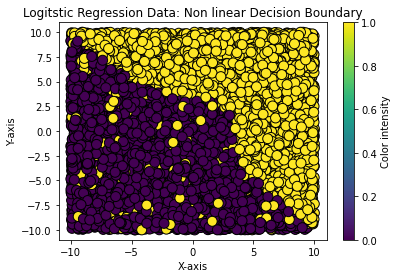

In [10]:
# Create the scatter plot
plot_size = 10_000
plt.scatter(x1_inputs[0:plot_size],
            x2_inputs[0:plot_size],
            c=noisy_labels[0:plot_size],
            cmap='viridis',
            s=100,
            edgecolor='k')

# Add a color bar
plt.colorbar(label='Color intensity')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Logitstic Regression Data: Non linear Decision Boundary')

# Show the plot
plt.show()